In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('ks-projects-201801.csv')

In [50]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [51]:
df = df[df.state != 'undefined']
df = df[df.state != 'canceled']
df = df[df.state != 'suspended']
df = df[df.state != 'live']

In [52]:
df = df[df.country != 'N,0"']

In [53]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.314650e+05,3.314650e+05,3.314650e+05,331465.000000,3.314650e+05,3.314650e+05,3.314650e+05
mean,1.074289e+09,4.426614e+04,1.058072e+04,116.455315,7.684569e+03,9.939901e+03,4.152320e+04
std,6.191989e+08,1.118264e+06,1.015112e+05,965.728598,8.320938e+04,9.664517e+04,1.109274e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.371717e+08,2.000000e+03,5.000000e+01,2.000000,2.500000e+01,5.000000e+01,2.000000e+03
50%,1.074682e+09,5.000000e+03,7.820000e+02,15.000000,5.020000e+02,7.874600e+02,5.000000e+03
75%,1.609866e+09,1.500000e+04,4.658000e+03,63.000000,3.421000e+03,4.609000e+03,1.500000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [54]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 331465 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                331465 non-null  int64  
 1   name              331462 non-null  object 
 2   category          331465 non-null  object 
 3   main_category     331465 non-null  object 
 4   currency          331465 non-null  object 
 5   deadline          331465 non-null  object 
 6   goal              331465 non-null  float64
 7   launched          331465 non-null  object 
 8   pledged           331465 non-null  float64
 9   state             331465 non-null  object 
 10  backers           331465 non-null  int64  
 11  country           331465 non-null  object 
 12  usd pledged       331465 non-null  float64
 13  usd_pledged_real  331465 non-null  float64
 14  usd_goal_real     331465 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 40.5+ MB


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,failed,4,US,0.0,154.0,6500.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [55]:
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])

campaign_duration = (df['deadline'] - df['launched']).dt.days

df.loc[:, 'campaign_duration'] = campaign_duration

In [56]:
one_hot_encoded = pd.get_dummies(df['main_category'], prefix='main_category', drop_first=True)
df = pd.concat([df, one_hot_encoded], axis=1)

In [57]:
one_hot_encoded = pd.get_dummies(df['country'], prefix='country', drop_first=True)
df = pd.concat([df, one_hot_encoded], axis=1)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [59]:
X = df.drop(['state', 'country', 'main_category', 'ID', 'name', 'category', 'currency', 'deadline', 'launched', 'pledged', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis=1)
y = df['state']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(max_iter= 2000)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))



Accuracy: 0.8884648454587966
              precision    recall  f1-score   support

      failed       0.87      0.96      0.91     39577
  successful       0.93      0.78      0.85     26716

    accuracy                           0.89     66293
   macro avg       0.90      0.87      0.88     66293
weighted avg       0.89      0.89      0.89     66293



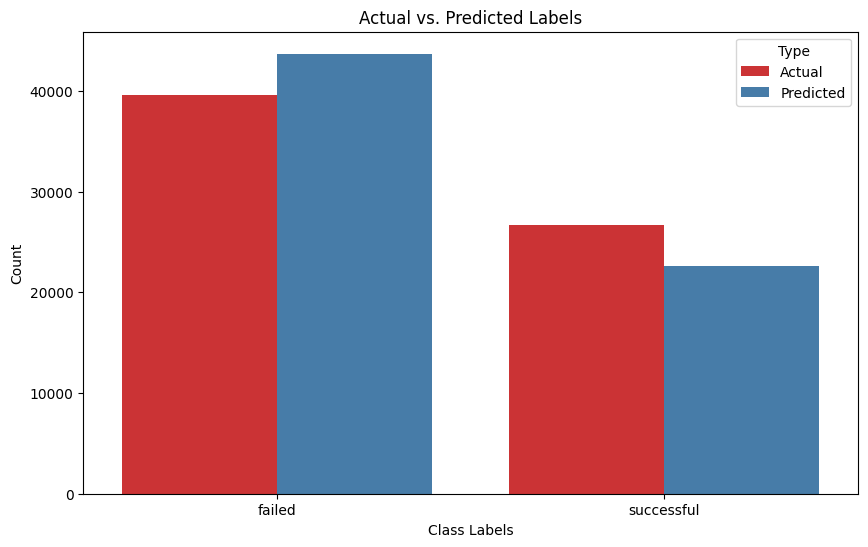

In [65]:
actual_df = pd.DataFrame({'Label': y_test, 'Type': 'Actual'})
predicted_df = pd.DataFrame({'Label': y_pred, 'Type': 'Predicted'})

combined_df = pd.concat([actual_df, predicted_df])

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='Label', hue='Type', palette='Set1')
plt.title('Actual vs. Predicted Labels')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('ks-projects-201801.csv')

In [67]:
df = df[df.state != 'undefined']
df = df[df.state != 'canceled']
df = df[df.state != 'suspended']
df = df[df.state != 'live']

df = df[df.country != 'N,0"']

In [68]:
one_hot_encoded = pd.get_dummies(df['main_category'], prefix='main_category', drop_first=True)
df = pd.concat([df, one_hot_encoded], axis=1)

In [69]:
one_hot_encoded = pd.get_dummies(df['country'], prefix='country', drop_first=True)
df = pd.concat([df, one_hot_encoded], axis=1)

In [71]:
X = df.drop(['state', 'country', 'main_category', 'ID', 'name', 'category', 'currency', 'deadline', 'launched', 'pledged', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis=1)
y = df['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.48
Classification Report:
              precision    recall  f1-score   support

      failed       0.97      0.13      0.23     39577
  successful       0.44      0.99      0.61     26716

    accuracy                           0.48     66293
   macro avg       0.70      0.56      0.42     66293
weighted avg       0.76      0.48      0.38     66293



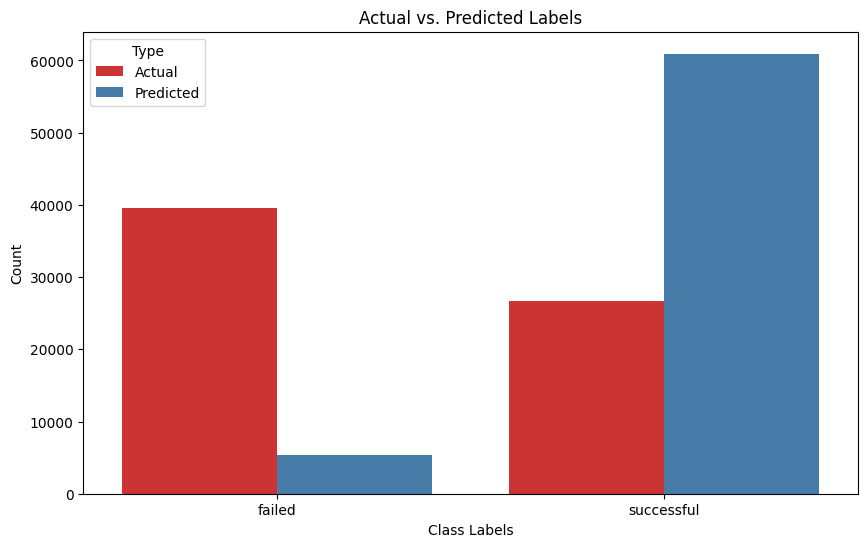

In [72]:
actual_df = pd.DataFrame({'Label': y_test, 'Type': 'Actual'})
predicted_df = pd.DataFrame({'Label': y_pred, 'Type': 'Predicted'})

combined_df = pd.concat([actual_df, predicted_df])

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='Label', hue='Type', palette='Set1')
plt.title('Actual vs. Predicted Labels')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [74]:
df = pd.read_csv('ks-projects-201801.csv')

In [75]:
df = df[df.state != 'undefined']
df = df[df.state != 'canceled']
df = df[df.state != 'suspended']
df = df[df.state != 'live']

df = df[df.country != 'N,0"']

In [76]:
one_hot_encoded = pd.get_dummies(df['main_category'], prefix='main_category', drop_first=True)
df = pd.concat([df, one_hot_encoded], axis=1)

In [77]:
one_hot_encoded = pd.get_dummies(df['country'], prefix='country', drop_first=True)
df = pd.concat([df, one_hot_encoded], axis=1)

In [80]:
X = df.drop(['state', 'country', 'main_category', 'ID', 'name', 'category', 'currency', 'deadline', 'launched', 'pledged', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis=1)
y = df['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

      failed       0.94      0.93      0.93     39577
  successful       0.90      0.90      0.90     26716

    accuracy                           0.92     66293
   macro avg       0.92      0.92      0.92     66293
weighted avg       0.92      0.92      0.92     66293



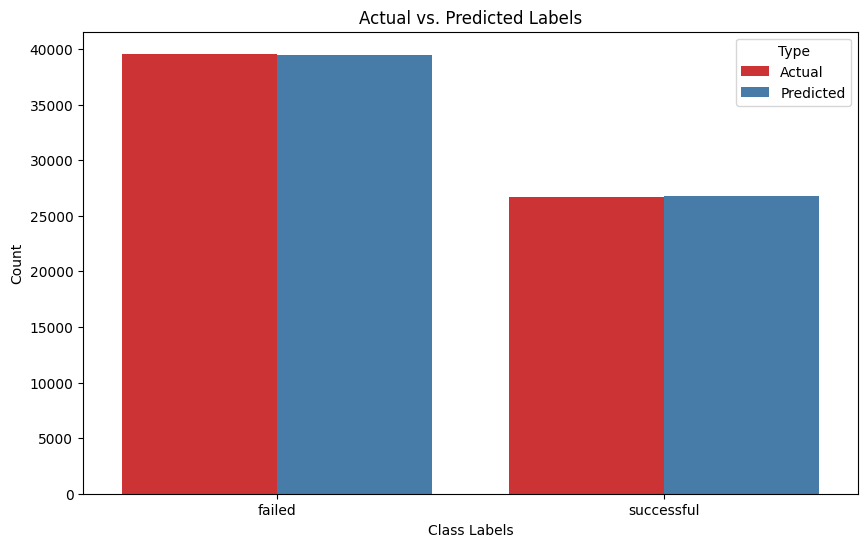

In [79]:
actual_df = pd.DataFrame({'Label': y_test, 'Type': 'Actual'})
predicted_df = pd.DataFrame({'Label': y_pred, 'Type': 'Predicted'})

combined_df = pd.concat([actual_df, predicted_df])

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='Label', hue='Type', palette='Set1')
plt.title('Actual vs. Predicted Labels')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()